### ***Initializing and Importing Packages***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import os
import networkx as nx
import seaborn as sns
import math

import Funcs

sns.color_palette("Set2")
sns.set_theme()
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":300})
# For the size of the graphics
sns.set(rc = {"figure.figsize":(4,4)})
sns.set(font_scale = 0.5)

DataDir = "../../../Data/"
FigsDir = "../../../Figs/"




In [7]:
DataDir = DataDir + 'Raw-Data/AlphaVantage/15min-Data'
symboles, markets, cryptos = Funcs.PrepDataNames(DataDir)

#### ***Plotting the Returns*** 

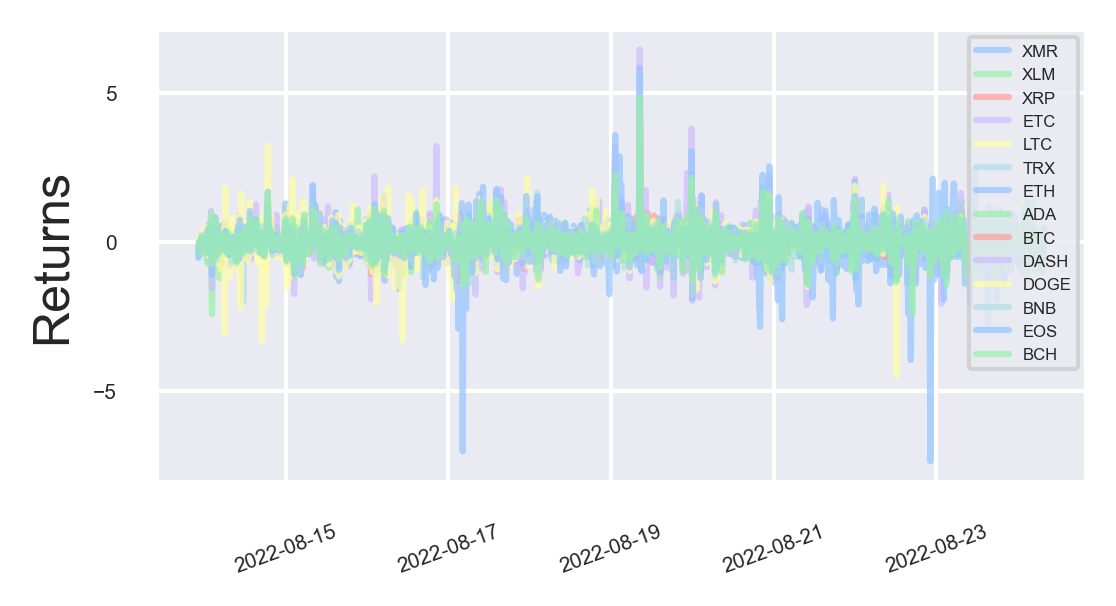

In [78]:
ReturnDict= Funcs.LoadData(DataDir, symboles, markets, cryptos)
ReturnDF_Time= pd.DataFrame.from_dict(ReturnDict['Timestamp'])
ReturnDF_USD = pd.DataFrame.from_dict(ReturnDict['USD'])
plt.style.use('seaborn-pastel')
for crypto in cryptos:
    plt.plot(ReturnDF_Time, ReturnDF_USD['%s' % crypto], label = '%s' % crypto, alpha = 0.7)

# minor_ticks = np.arange(0,1000,20)
# plt.xticks(minor_ticks, minor=True)
plt.xticks(rotation=20, fontsize = 5)
# plt.title('Minutly Returns of coins in US Market')
#plt.xlabel('Time')
plt.yticks(fontsize = 5)
plt.ylabel('Returns')
plt.legend(loc=1, prop={'size': 4})
plt.savefig('stationary.jpg', bbox_inches='tight')
# plt.show()

### ***The Eddy-Fuller test***

In [69]:
Funcs.Eddy_Fuller_test(ReturnDF_USD, cryptos)

p-value (XMR) = 0.0 
p-value (XLM) = 0.0 
p-value (XRP) = 0.0 
p-value (ETC) = 1.0634100991239234e-25 
p-value (LTC) = 0.0 
p-value (TRX) = 5.4415764740998084e-30 
p-value (ETH) = 0.0 
p-value (ADA) = 0.0 
p-value (BTC) = 8.220178396092641e-25 
p-value (DASH) = 7.788190789203972e-17 
p-value (DOGE) = 0.0 
p-value (BNB) = 0.0 
p-value (EOS) = 0.0 
p-value (BCH) = 1.1031948106402074e-28 


### ***Optimum Lag***

In [24]:
Funcs.Optimum_lag(ReturnDF_USD,24)

,AIC,BIC,FPE,HQIC
0,-38.04*,-37.97*,3.028e-17*,-38.01*
1,-37.95,-36.90,3.310e-17,-37.55
2,-37.81,-35.78,3.781e-17,-37.04
3,-37.67,-34.66,4.371e-17,-36.52
4,-37.52,-33.53,5.075e-17,-36.00
5,-37.33,-32.35,6.187e-17,-35.43
6,-37.12,-31.16,7.594e-17,-34.86
7,-36.99,-30.05,8.712e-17,-34.35
8,-36.83,-28.91,1.024e-16,-33.82
9,-36.70,-27.80,1.175e-16,-33.31


### ***Granger-Cause Test***

In [70]:
maxlag_ = 5
P_val_Dataframe, F_val_Dataframe = Funcs.grangers_causation_matrix(ReturnDF_USD, maxlag_, variables=ReturnDF_USD.columns)


In [71]:
F_val_Dataframe #the dataframe consisting of the F scores for lag = 4

,XMR_x,XLM_x,XRP_x,ETC_x,LTC_x,TRX_x,ETH_x,ADA_x,BTC_x,DASH_x,DOGE_x,BNB_x,EOS_x,BCH_x
XMR_y,0.0000,0.4582,0.8901,1.5637,1.2291,2.1174,0.6967,1.1168,1.9259,0.9522,2.8384,2.0254,0.6898,0.4748
XLM_y,1.4084,0.0000,0.9368,1.0537,0.8307,2.9870,0.2395,1.5972,1.7943,0.8618,1.4467,0.9902,1.3515,1.3397
XRP_y,2.6695,2.9687,0.0000,1.7138,0.9754,3.0188,2.1620,2.8091,2.9447,1.5041,3.4491,1.1888,0.2902,1.4892
ETC_y,3.3912,0.7130,0.5704,0.0000,0.3334,1.4870,1.3585,1.6240,1.1674,0.2749,0.4566,1.3351,0.5122,0.4666
LTC_y,0.7528,1.4256,0.6753,0.8720,-0.0000,2.2663,1.3556,0.5546,2.0836,0.8048,1.2291,1.0504,0.6820,1.7116
TRX_y,0.3073,0.9631,1.2202,0.5648,0.2671,0.0000,1.6795,0.7703,2.0726,0.6931,1.3931,1.7654,0.7277,1.1429
ETH_y,1.1004,1.4782,0.5958,1.0463,1.3084,2.9097,0.0000,2.7994,1.2982,1.4125,1.9279,3.6448,0.4434,1.4165
ADA_y,1.9012,0.7252,0.4029,0.3759,0.5683,1.7442,1.1077,0.0000,2.0864,0.0349,0.2414,0.5777,0.3943,0.7138
BTC_y,2.2525,1.2099,1.2223,2.5204,2.6664,3.0464,2.1804,3.5407,0.0000,2.8328,2.4340,3.3496,0.3663,2.3838
DASH_y,0.8173,1.6502,0.2665,0.7017,0.5529,2.5566,1.1839,0.4928,3.0073,0.0000,1.2863,0.3748,0.2295,1.8928


In [72]:
P_val_Dataframe #the dataframe consisting the minimum p-values

,XMR_x,XLM_x,XRP_x,ETC_x,LTC_x,TRX_x,ETH_x,ADA_x,BTC_x,DASH_x,DOGE_x,BNB_x,EOS_x,BCH_x
XMR_y,1.0000,0.2820,0.1302,0.0878,0.1272,0.0310,0.4681,0.3235,0.0187,0.2028,0.0135,0.0368,0.3763,0.3617
XLM_y,0.0176,1.0000,0.4489,0.3773,0.2303,0.0008,0.8773,0.1216,0.1062,0.1468,0.1983,0.3624,0.2333,0.0955
XRP_y,0.0048,0.0020,1.0000,0.1232,0.3151,0.0059,0.0151,0.0077,0.0055,0.1551,0.0037,0.3052,0.7329,0.1274
ETC_y,0.0007,0.2965,0.1398,1.0000,0.2663,0.0338,0.0791,0.0235,0.1733,0.2779,0.7525,0.0229,0.1308,0.4903
LTC_y,0.2242,0.0624,0.3940,0.4922,1.0000,0.0211,0.1826,0.7302,0.0614,0.2512,0.2859,0.3791,0.4930,0.0584
TRX_y,0.4898,0.2461,0.0953,0.4129,0.6162,1.0000,0.0594,0.3111,0.0461,0.5932,0.2174,0.0098,0.2925,0.2535
ETH_y,0.2144,0.0435,0.4400,0.2887,0.1828,0.0057,1.0000,0.0097,0.1583,0.1306,0.0827,0.0012,0.5124,0.0708
ADA_y,0.0145,0.2169,0.7758,0.4641,0.3045,0.0191,0.2498,1.0000,0.0611,0.8256,0.6211,0.6488,0.6219,0.2110
BTC_y,0.0172,0.1795,0.1642,0.0259,0.0138,0.0036,0.0287,0.0030,1.0000,0.0078,0.0308,0.0026,0.6916,0.0154
DASH_y,0.1469,0.0547,0.8835,0.2483,0.1771,0.0102,0.1802,0.4562,0.0095,1.0000,0.1484,0.7732,0.5703,0.0358


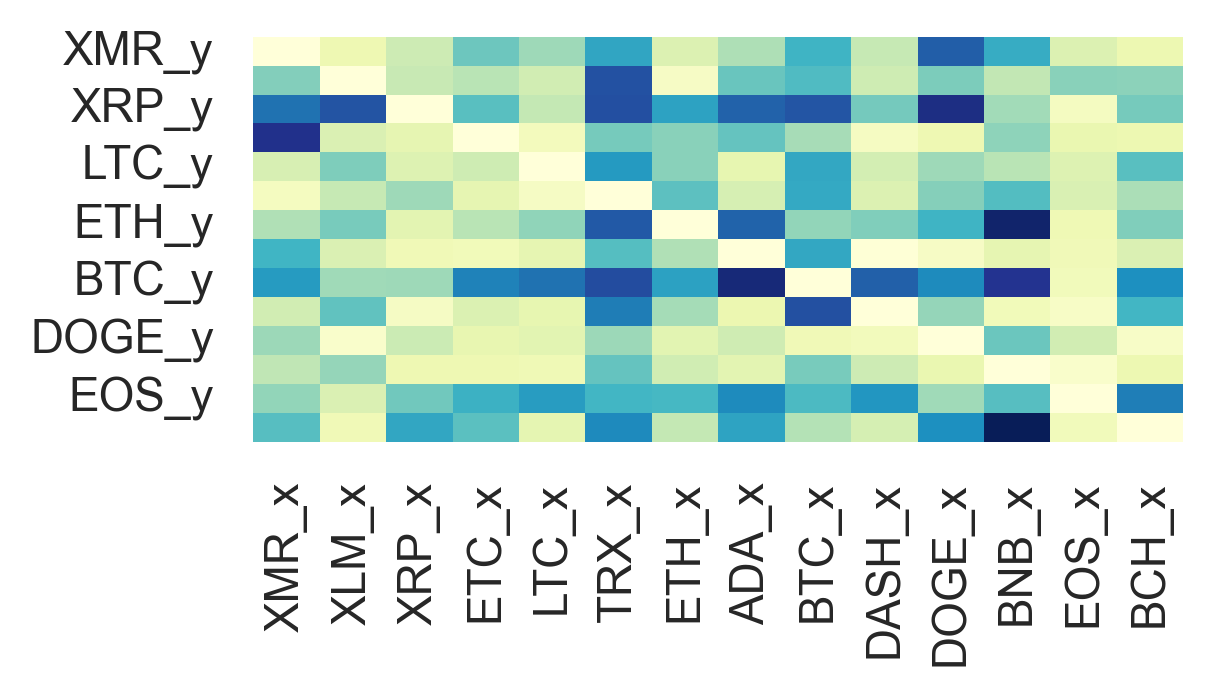

In [76]:
# plt.subplot(1,2,2)
sns.heatmap(F_val_Dataframe, annot = False, cmap="YlGnBu", cbar = False)
# plt.title('F-scores')
# plt.subplot(1,2,1)

#plt.xticks(rotation=90)

# plt.suptitle('Heatmap Plots for Granger-Causality Test Results')
plt.subplots_adjust(top=0.8)
plt.savefig("Fvalues.jpg", bbox_inches='tight')


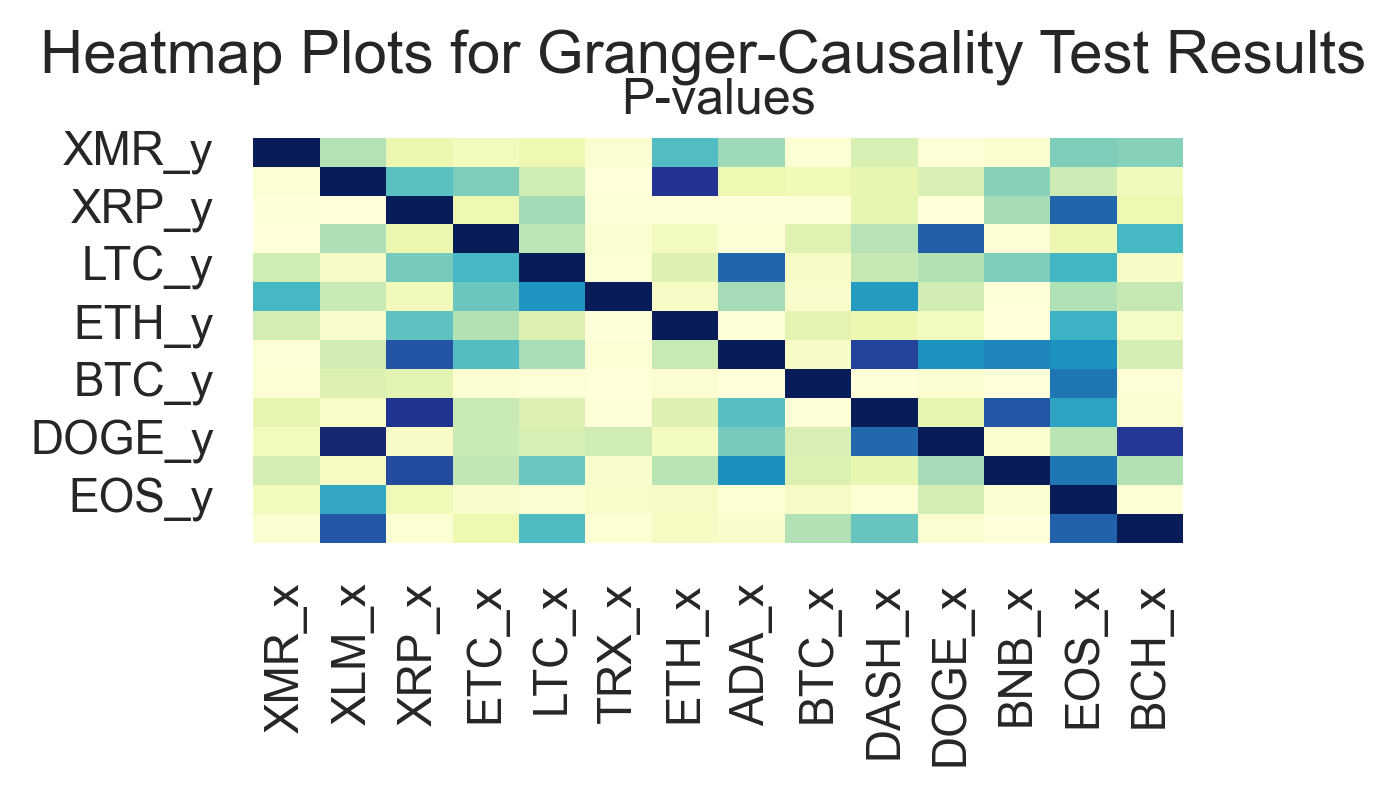

In [77]:
sns.heatmap(P_val_Dataframe, annot = False, cmap="YlGnBu" , cbar = False )
plt.title('P-values')
plt.suptitle('Heatmap Plots for Granger-Causality Test Results')
plt.subplots_adjust(top=0.8)
plt.savefig("Pvalues.jpg", bbox_inches='tight')

### ***Graph***

In [45]:
# def CalculateDistance(c) : 
#     return math.sqrt(2) * (1 - c)

In [46]:
# Matrix_P = np.array(P_val_Dataframe)

In [47]:
# Matrix_PP = Funcs.ScaleData(Matrix_P)

In [48]:
# Mat = CalculateDistance(Matrix_PP)

In [24]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

In [32]:
H.edges(data=True)

EdgeDataView([('BNB', 'ETH', {'weight': 0.000707602102658363}), ('BNB', 'BCH', {'weight': 0.000849122523190067}), ('BNB', 'BTC', {'weight': 0.002688887990101905}), ('BNB', 'ETC', {'weight': 0.03141753335803327}), ('DASH', 'BTC', {'weight': 0.010047949857749414}), ('XMR', 'XRP', {'weight': 0.005802337241798922}), ('TRX', 'XLM', {'weight': 0.000141520420531704}), ('TRX', 'BTC', {'weight': 0.004104092195418788}), ('XLM', 'XRP', {'weight': 0.0018397654669118381}), ('LTC', 'BTC', {'weight': 0.01853917508965024}), ('DOGE', 'XRP', {'weight': 0.004245612615950492}), ('ADA', 'BTC', {'weight': 0.003254969672228564}), ('ADA', 'EOS', {'weight': 0.022501746864537327})])

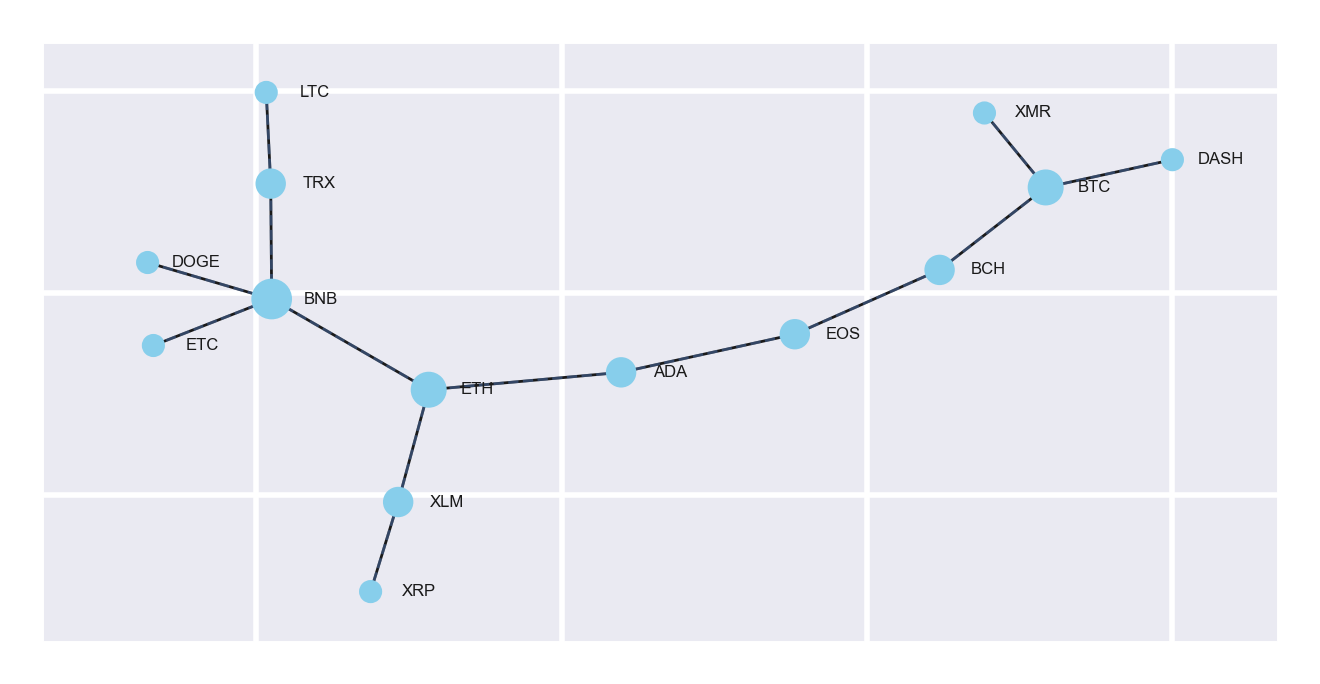

In [25]:
sns.set(rc = {"figure.figsize":(4,2)})

G_ = nx.from_numpy_array(Mat)

G=nx.minimum_spanning_tree(G_)

labels={}
for i in range(len(G.nodes())):
    labels[list(G.nodes)[i]] = cryptos[i]   
H = nx.relabel_nodes(G, labels)
pos = nx.spring_layout(H, seed=7, weight='length')
pos_nodes = nudge(pos, 0.08, 0)

weight_labels = nx.get_edge_attributes(H,'weight')
# elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] <= 0.5]

d = dict(H.degree)
nx.draw_networkx_nodes(H, pos, node_size = [v * 10 for v in d.values()], node_color="skyblue")
nx.draw_networkx_labels(H, pos_nodes, font_size=3, font_family="sans-serif")
nx.draw_networkx_edges(H, pos, width=0.5)
nx.draw_networkx_edges(
    H, pos, width=0.5, alpha=0.5, edge_color="b", style="dashed")

#plt.savefig('MSTGRaph.jpg')


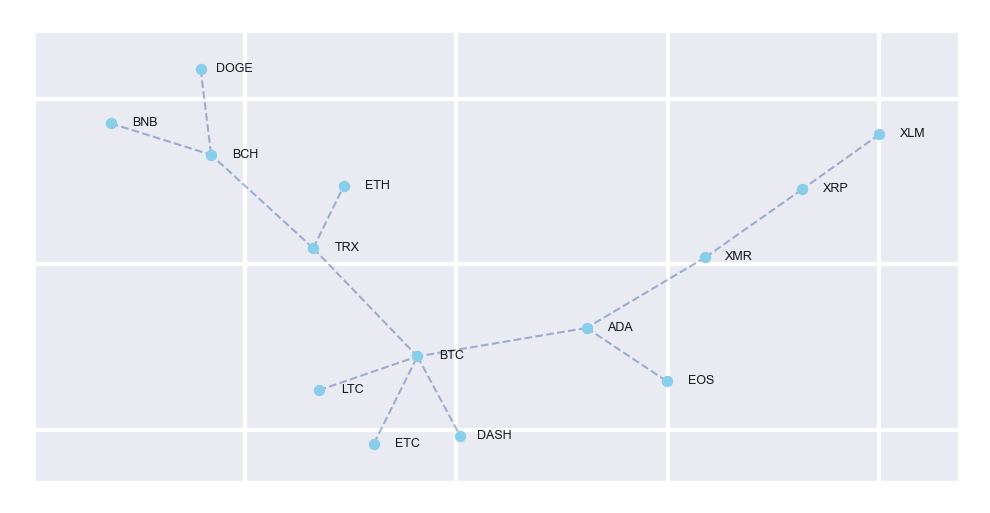

In [15]:
sns.set(rc = {"figure.figsize":(5,5)})
Matrix_P = np.array(P_val_Dataframe)
Matrix_PP = Funcs.ScaleData(Matrix_P)
Mat = Funcs.CalculateDistance(Matrix_PP)

Funcs.MST_Graph(Mat, cryptos)
plt.savefig('secondGraph.jpg')

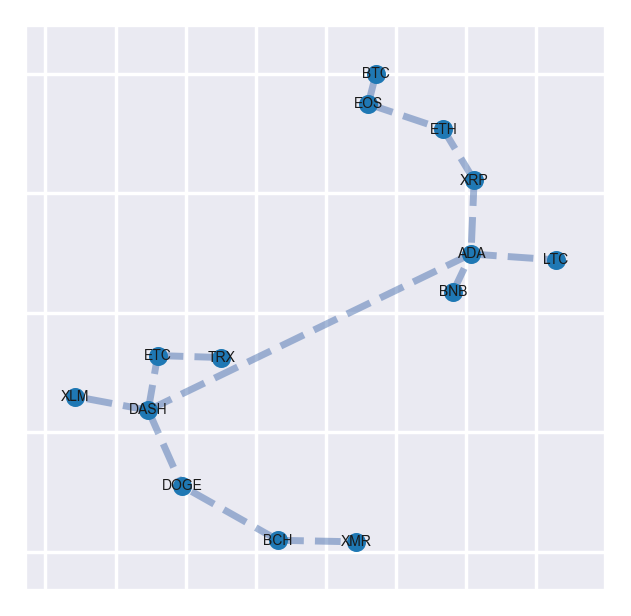

In [52]:
Matrix_F = np.array(F_val_Dataframe)
Matrix_FF = Funcs.ScaleData(Matrix_F)
Mat = Funcs.CalculateDistance(Matrix_FF)
Funcs.MST_Graph(Mat, cryptos)